In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [30]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\Devika
[nltk_data]     Arora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Devika
[nltk_data]     Arora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Devika
[nltk_data]     Arora\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:

file_path = "D:\Desktop\Sem 3\ANLP\TextAnalysis\Australian Skills Classification - December 2023.xlsx"
sheets = ["Occupation descriptions", "Core competency descriptions", "Specialist tasks hierarchy", "Tech tools heirarchy", "Core competencies", "Specialist tasks data", "Technology tools"]

occupation_df = pd.read_excel(file_path, sheet_name=sheets[0])
cc_desc_df = pd.read_excel(file_path, sheet_name=sheets[1])
cc_df = pd.read_excel(file_path, sheet_name=sheets[4])
st_hier_df = pd.read_excel(file_path, sheet_name=sheets[2])
st_df = pd.read_excel(file_path, sheet_name=sheets[5])
tt_hier_df = pd.read_excel(file_path, sheet_name=sheets[3])
tt_df = pd.read_excel(file_path, sheet_name=sheets[6])


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_52756\2545082455.py:1: SyntaxWarning: invalid escape sequence '\D'
  file_path = "D:\Desktop\Sem 3\ANLP\TextAnalysis\Australian Skills Classification - December 2023.xlsx"


In [32]:
df_list = [
    ("occupation_df", occupation_df),
    ("cc_desc_df", cc_desc_df),
    ("cc_df", cc_df),
    ("st_hier_df", st_hier_df),
    ("st_df", st_df),
    ("tt_hier_df", tt_hier_df),
    ("tt_df", tt_df),
]

for name, df in df_list:
    print(f"{name} columns: {df.columns.tolist()}")


occupation_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'ANZSCO Description']
cc_desc_df columns: ['Core Competency', 'Core Competency Description', 'Score', 'Proficiency Level', 'Anchor Value']
cc_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level', 'Anchor Value']
st_hier_df columns: ['Specialist Task', 'Specialist Cluster', 'Cluster Family', 'Skill Statement']
st_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title', 'Specialist Task', '% of time spent on task', 'Emerging/\nTrending Flag', 'Specialist Cluster', ' % of time spent on cluster', 'Cluster Family', '% of time spent on family', 'Skills Statement']
tt_hier_df columns: ['Technology Tool Category', 'Technology Tool Category Description', 'Technology Tool', 'Technology Tool Description', 'Technology Tool Extended Description']
tt_df columns: ['Occupation Type', 'ANZSCO Code', 'Sub-Pro

In [53]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB


In [ ]:
occupation_df['Occupation Type'].nunique()

5

In [58]:
occupation_df['Occupation Type'].unique()

array(['ANZSCO 4', 'ANZSCO 6', 'Specialisation',
       'NEC Category Occupation', 'NEC Category'], dtype=object)

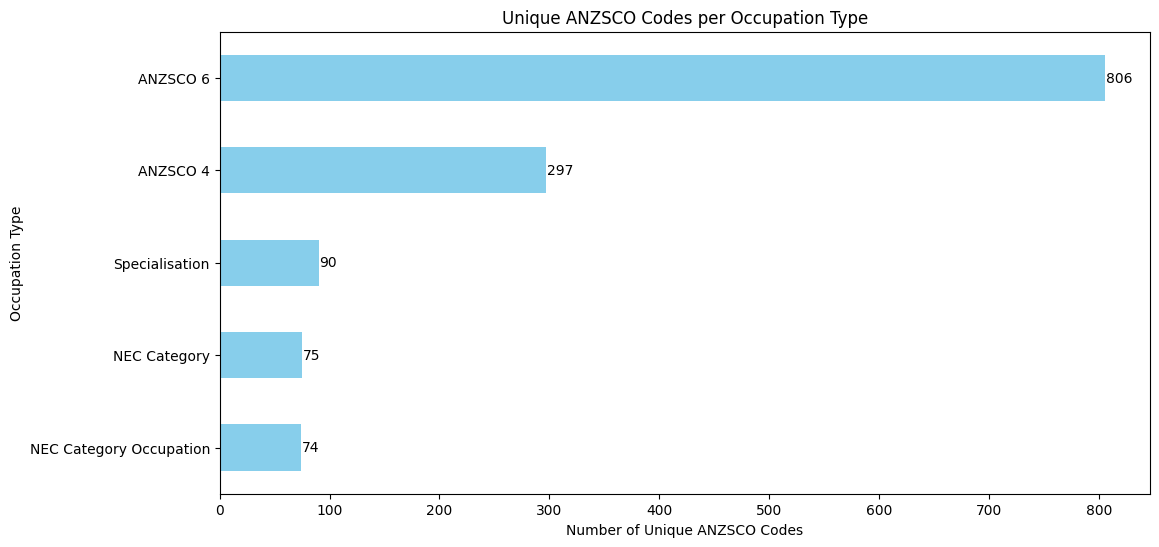

In [60]:
import matplotlib.pyplot as plt

# Count unique ANZSCO Codes per Occupation Type
occupation_counts = occupation_df.groupby('Occupation Type')['ANZSCO Code'].nunique()

# Sort values for better visualization
occupation_counts = occupation_counts.sort_values()

# Plot the results
plt.figure(figsize=(12, 6))
ax = occupation_counts.plot(kind='barh', color='skyblue')

# Add value labels at the end of each bar
for index, value in enumerate(occupation_counts):
    ax.text(value + 0.5, index, str(value), va='center', fontsize=10)

plt.xlabel("Number of Unique ANZSCO Codes")
plt.ylabel("Occupation Type")
plt.title("Unique ANZSCO Codes per Occupation Type")
plt.show()


In [33]:
def merge_all_dataframes(df1, df2, df3, col_1, col_2):
    merged_df = df3.merge(df1, on=col_1, how="left")
    merged_df = merged_df.merge(df2, on=col_2, how="left")
    print("\nFinal Merged Dataset Sample:") 
    print(merged_df.head())
    return merged_df  


#c_merged_df = merge_all_dataframes(cc_desc_df, occupation_df, cc_df, "Core Competency", "ANZSCO Code")
tt_merged_df = merge_all_dataframes(tt_df, occupation_df, tt_hier_df, "Technology Tool", "ANZSCO Code")
st_merged_df = merge_all_dataframes(st_hier_df, occupation_df, st_df, "Specialist Task", "ANZSCO Code")




Final Merged Dataset Sample:
                            Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                   

In [34]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/
Trending Flag      1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  Specialist Cluster_y         67772 non-null  object 
 13  Cluster Family_y

In [35]:
st_merged_df.head()

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Specialist Task,% of time spent on task,Emerging/\nTrending Flag,Specialist Cluster_x,% of time spent on cluster,Cluster Family_x,% of time spent on family,Skills Statement,Specialist Cluster_y,Cluster Family_y,Skill Statement,Occupation Type_y,Sub-Profile Code_y,ANZSCO Title_y,ANZSCO Description
0,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Direct or manage financial activities or opera...,0.1302,NaN,"Manage, monitor and undertake financial activi...",0.1644,Business operations and financial activities,0.5322,Direct and oversee the financial operations of...,"Manage, monitor and undertake financial activi...",Business operations and financial activities,Direct and oversee the financial operations of...,ANZSCO 4,NaN,Chief Executives and Managing Directors,Chief Executives and Managing Directors determ...
1,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Direct department or organisational activities,0.1117,Trending,"Manage services, staff or activities",0.2128,Business operations and financial activities,0.5322,Direct and oversee the activities of a work un...,"Manage services, staff or activities",Business operations and financial activities,Direct and oversee the activities of a work un...,ANZSCO 4,NaN,Chief Executives and Managing Directors,Chief Executives and Managing Directors determ...
2,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,"Direct sales, marketing or customer service ac...",0.0808,NaN,"Manage services, staff or activities",0.2128,Business operations and financial activities,0.5322,"Direct and oversee the sales, marketing, or cu...","Manage services, staff or activities",Business operations and financial activities,"Direct and oversee the sales, marketing, or cu...",ANZSCO 4,NaN,Chief Executives and Managing Directors,Chief Executives and Managing Directors determ...
3,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,"Communicate with others to arrange, coordinate...",0.0665,NaN,Communicate or collaborate with others,0.0750,Communication and collaboration,0.0890,"Coordinate with others in order to plan, organ...",Communicate or collaborate with others,Communication and collaboration,"Coordinate with others in order to plan, organ...",ANZSCO 4,NaN,Chief Executives and Managing Directors,Chief Executives and Managing Directors determ...
4,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Analyse data to assess operational or project ...,0.0651,NaN,Use data to inform operational decisions,0.1009,"Data, analytics, and databases",0.1370,Analyse qualitative and quantitative data aris...,Use data to inform operational decisions,"Data, analytics, and databases",Analyse qualitative and quantitative data aris...,ANZSCO 4,NaN,Chief Executives and Managing Directors,Chief Executives and Managing Directors determ...


In [36]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12910 entries, 0 to 12909
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              12910 non-null  object
 1   Technology Tool Category Description  12910 non-null  object
 2   Technology Tool                       12910 non-null  object
 3   Technology Tool Description           12910 non-null  object
 4   Technology Tool Extended Description  12910 non-null  object
 5   Occupation Type_x                     12910 non-null  object
 6   ANZSCO Code                           12910 non-null  int64 
 7   Sub-Profile Code_x                    7543 non-null   object
 8   ANZSCO Title_x                        12910 non-null  object
 9   Emerging/Trending Flag                556 non-null    object
 10  Occupation Type_y                     12905 non-null  object
 11  Sub-Profile Code_y          

In [37]:
tt_merged_df.head()

,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Emerging/Trending Flag,Occupation Type_y,Sub-Profile Code_y,ANZSCO Title_y,ANZSCO Description
0,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 4,2123,NaN,"Film, Television, Radio and Stage Directors",NaN,ANZSCO 4,NaN,"Film, Television, Radio and Stage Directors","Film, Television, Radio and Stage Directors di..."
1,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 4,2124,NaN,Journalists and Other Writers,NaN,ANZSCO 4,NaN,Journalists and Other Writers,Journalists and Other Writers research and com...
2,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212113,NaN,Radio Presenter,NaN,ANZSCO 6,NaN,Radio Presenter,"Prepares and presents news, sports or other in..."
3,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212312,NaN,"Director (Film, Television, Radio or Stage)",NaN,ANZSCO 6,NaN,"Director (Film, Television, Radio or Stage)","Interprets and approves selection of scripts, ..."
4,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212315,NaN,Program Director (Television or Radio),NaN,ANZSCO 6,NaN,Program Director (Television or Radio),Compiles and directs programs for television o...


In [38]:
def merge_all_dataframes(df1, df2, df3):
    merged_df = pd.merge(df1, df3, on=["ANZSCO Code", "ANZSCO Title"], how="left")

    print("\nStep 1: Core Competencies merged with Occupation Data")
    print(merged_df.head())
    merged_df = pd.merge(merged_df, df2, on=["Core Competency", "Score"], how="left", suffixes=("", "_desc"))

    print("\nStep 2: Final Merged Dataset with Descriptions")
    print(merged_df.head())

    return merged_df

cc_merged_df = merge_all_dataframes(cc_df, cc_desc_df, occupation_df)



Step 1: Core Competencies merged with Occupation Data
  Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      In

In [39]:
cc_merged_df.head(5)

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title,Core Competency,Score,Proficiency Level,Anchor Value,Occupation Type_y,Sub-Profile Code_y,ANZSCO Description,Core Competency Description,Proficiency Level_desc,Anchor Value_desc
0,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Digital engagement,5,Intermediate,Build and maintain an effective online profile...,ANZSCO 6,NaN,Assists Aboriginal and Torres Strait Islander ...,Identifying and using technology (including ha...,Intermediate,Build and maintain an effective online profile...
1,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Initiative and innovation,8,High,Negotiate a price and sales terms then prepare...,ANZSCO 6,NaN,Assists Aboriginal and Torres Strait Islander ...,"Taking on responsibilities and challenges, bei...",High,Negotiate a price and sales terms then prepare...
2,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Learning,5,Intermediate,Learn a new filing system that groups document...,ANZSCO 6,NaN,Assists Aboriginal and Torres Strait Islander ...,Understanding the implications of new informat...,Intermediate,Learn a new filing system that groups document...
3,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Numeracy,4,Intermediate,Use a blood pressure machine and accurately re...,ANZSCO 6,NaN,Assists Aboriginal and Torres Strait Islander ...,Using mathematics to solve problems and interp...,Intermediate,Use a blood pressure machine and accurately re...
4,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Oral communication,7,Intermediate,Participate in a work meeting and ask appropri...,ANZSCO 6,NaN,Assists Aboriginal and Torres Strait Islander ...,The ability to communicate information and ide...,Intermediate,Participate in a work meeting and ask appropri...


In [40]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

In [41]:
cc_merged_df.drop(columns=["Sub-Profile Code_x", "Sub-Profile Code_y", "Occupation Type_y" , "Occupation Type_y" , "Proficiency Level_desc" , "Anchor Value_desc"], inplace=True)
cc_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'ANZSCO Title', 'Core Competency',
       'Score', 'Proficiency Level', 'Anchor Value', 'ANZSCO Description',
       'Core Competency Description'],
      dtype='object')

In [42]:
tt_merged_df.drop(columns=["Sub-Profile Code_x", "Sub-Profile Code_y", "Occupation Type_y" , "ANZSCO Title_y" ], inplace=True)
tt_merged_df.columns

Index(['Technology Tool Category', 'Technology Tool Category Description',
       'Technology Tool', 'Technology Tool Description',
       'Technology Tool Extended Description', 'Occupation Type_x',
       'ANZSCO Code', 'ANZSCO Title_x', 'Emerging/Trending Flag',
       'ANZSCO Description'],
      dtype='object')

In [43]:
st_merged_df.drop(columns=["Sub-Profile Code_x", "Sub-Profile Code_y", "Occupation Type_y", "Specialist Cluster_y" , "Cluster Family_y"  , "ANZSCO Title_y"], inplace=True)
st_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'ANZSCO Title_x', 'Specialist Task',
       '% of time spent on task', 'Emerging/\nTrending Flag',
       'Specialist Cluster_x', ' % of time spent on cluster',
       'Cluster Family_x', '% of time spent on family', 'Skills Statement',
       'Skill Statement', 'ANZSCO Description'],
      dtype='object')

In [44]:
cc_merged_df = cc_merged_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
st_merged_df = st_merged_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
tt_merged_df = tt_merged_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)



C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_52756\784907312.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cc_merged_df = cc_merged_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_52756\784907312.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  st_merged_df = st_merged_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_52756\784907312.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tt_merged_df = tt_merged_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [45]:
cc_merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Occupation Type_x            11030 non-null  object
 1   ANZSCO Code                  11030 non-null  int64 
 2   ANZSCO Title                 11030 non-null  object
 3   Core Competency              11030 non-null  object
 4   Score                        11030 non-null  int64 
 5   Proficiency Level            11030 non-null  object
 6   Anchor Value                 11030 non-null  object
 7   ANZSCO Description           11030 non-null  object
 8   Core Competency Description  11030 non-null  object
dtypes: int64(2), object(7)
memory usage: 775.7+ KB


In [46]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    if isinstance(text, str):  
        return " ".join(word for word in text.split() if word.lower() not in stop_words)
    return text  

cc_merged_df = cc_merged_df.applymap(remove_stopwords)
st_merged_df = st_merged_df.applymap(remove_stopwords)
tt_merged_df = tt_merged_df.applymap(remove_stopwords)

C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_52756\2418823978.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cc_merged_df = cc_merged_df.applymap(remove_stopwords)
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_52756\2418823978.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  st_merged_df = st_merged_df.applymap(remove_stopwords)
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_52756\2418823978.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tt_merged_df = tt_merged_df.applymap(remove_stopwords)


In [47]:
cc_merged_df = cc_merged_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
st_merged_df = st_merged_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
tt_merged_df = tt_merged_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_52756\2631877890.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cc_merged_df = cc_merged_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_52756\2631877890.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  st_merged_df = st_merged_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\Devika Arora\AppData\Local\Temp\ipykernel_52756\2631877890.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tt_merged_df = tt_merged_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [48]:
cc_merged_df = cc_merged_df.replace(',', '', regex=True)
tt_merged_df = tt_merged_df.replace(',', '', regex=True)
st_merged_df = st_merged_df.replace(',', '', regex=True)


In [49]:
cc_merged_df.head(20)

,Occupation Type_x,ANZSCO Code,ANZSCO Title,Core Competency,Score,Proficiency Level,Anchor Value,ANZSCO Description,Core Competency Description
0,anzsco 6,422111,aboriginal torres strait islander education wo...,digital engagement,5,intermediate,build maintain effective online profile career...,assists aboriginal torres strait islander stud...,identifying using technology (including hardwa...
1,anzsco 6,422111,aboriginal torres strait islander education wo...,initiative innovation,8,high,negotiate price sales terms prepare contract h...,assists aboriginal torres strait islander stud...,taking responsibilities challenges able start ...
2,anzsco 6,422111,aboriginal torres strait islander education wo...,learning,5,intermediate,learn new filing system groups documents type ...,assists aboriginal torres strait islander stud...,understanding implications new information cur...
3,anzsco 6,422111,aboriginal torres strait islander education wo...,numeracy,4,intermediate,use blood pressure machine accurately record r...,assists aboriginal torres strait islander stud...,using mathematics solve problems interpreting ...
4,anzsco 6,422111,aboriginal torres strait islander education wo...,oral communication,7,intermediate,participate work meeting ask appropriate follo...,assists aboriginal torres strait islander stud...,ability communicate information ideas speaking...
5,anzsco 6,422111,aboriginal torres strait islander education wo...,planning organising,8,high,develop program multiple live musical performa...,assists aboriginal torres strait islander stud...,developing specific goals plans prioritise org...
6,anzsco 6,422111,aboriginal torres strait islander education wo...,problem solving,5,intermediate,find evidence support history essay rare document,assists aboriginal torres strait islander stud...,identifying complex problems reviewing related...
7,anzsco 6,422111,aboriginal torres strait islander education wo...,reading,5,intermediate,read interpret instructions technical drawings...,assists aboriginal torres strait islander stud...,understanding written sentences paragraphs wor...
8,anzsco 6,422111,aboriginal torres strait islander education wo...,teamwork,9,high,work range subject matter experts diverse pers...,assists aboriginal torres strait islander stud...,working effectively others personally connecte...
9,anzsco 6,422111,aboriginal torres strait islander education wo...,writing,6,intermediate,write memo staff outlining new directives,assists aboriginal torres strait islander stud...,communicating effectively writing way appropri...


In [50]:
cc_merged_df['Core Competency'].nunique()

10

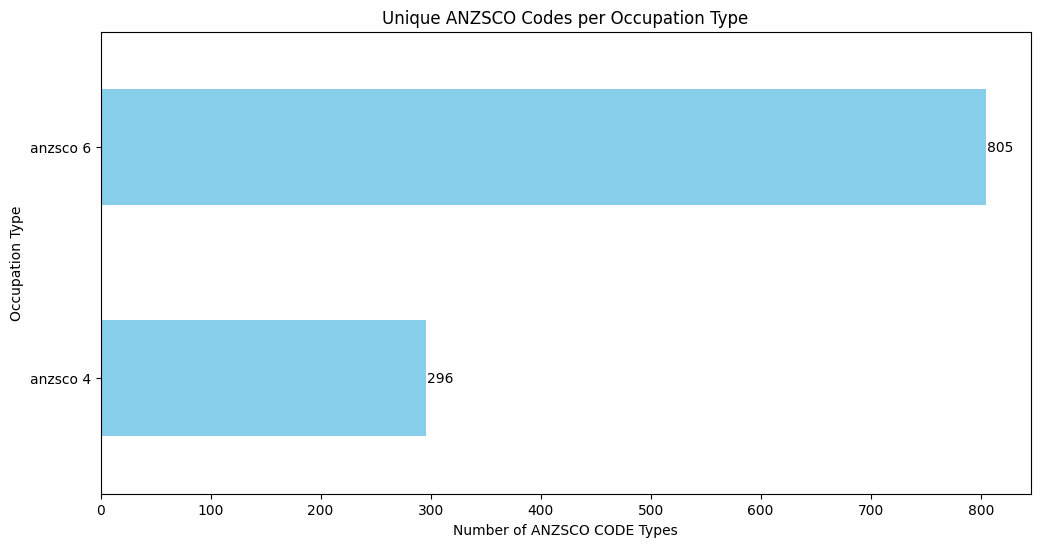

In [77]:

# Count unique ANZSCO Codes per Occupation Type
occupation_counts = cc_merged_df.groupby('Occupation Type_x')['ANZSCO Code'].nunique()

# Sort values for better visualization
occupation_counts = occupation_counts.sort_values()

# Plot the results
plt.figure(figsize=(12, 6))
ax = occupation_counts.plot(kind='barh', color='skyblue')

# Add value labels at the end of each bar
for index, value in enumerate(occupation_counts):
    ax.text(value + 0.5, index, str(value), va='center', fontsize=10)

plt.xlabel("Number of ANZSCO CODE Types")
plt.ylabel("Occupation Type")
plt.title("Unique ANZSCO Codes per Occupation Type")
plt.show()


   Occ Type  Number of Core Competencies
0  anzsco 4                           10
1  anzsco 6                           10


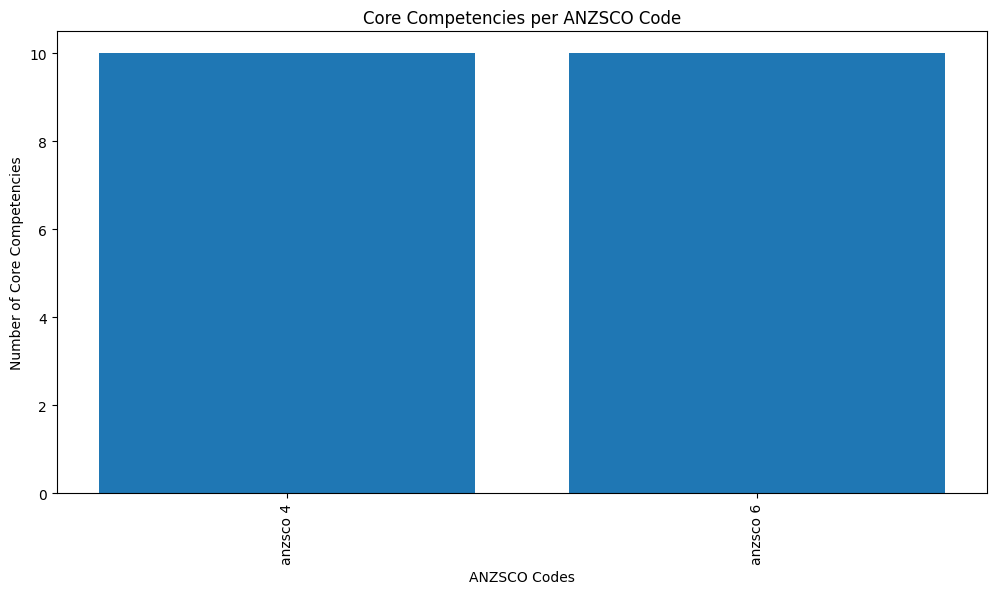

In [52]:
core_competency_counts = cc_merged_df.groupby("Occupation Type_x")["Core Competency"].nunique().reset_index()
core_competency_counts.columns = ["Occ Type", "Number of Core Competencies"]

# Display the result
print(core_competency_counts.sort_values(by="Number of Core Competencies", ascending=False))


plt.figure(figsize=(12, 6))
plt.bar(core_competency_counts["Occ Type"], core_competency_counts["Number of Core Competencies"])
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel("ANZSCO Codes")
plt.ylabel("Number of Core Competencies")
plt.title("Core Competencies per ANZSCO Code")
plt.show()


In [74]:
# Count occurrences of each ANZSCO Code (how many Core Competencies they have)
anzsco_counts = cc_merged_df['ANZSCO Code'].value_counts()

# Check if all ANZSCO Codes have exactly 10 core competencies
if anzsco_counts.eq(10).all():
    print("✅ All ANZSCO Codes have exactly 10 core competencies.")
else:
    print("❌ Some ANZSCO Codes do not have exactly 10 core competencies.")
    print("\n🔍 Breakdown of ANZSCO Code counts:")
    print(anzsco_counts.value_counts())  # How many have 10, how many have different numbers
    print("\n⚠️ ANZSCO Codes with non-10 values:")
    print(anzsco_counts[anzsco_counts != 10])

❌ Some ANZSCO Codes do not have exactly 10 core competencies.

🔍 Breakdown of ANZSCO Code counts:
count
10    1099
20       2
Name: count, dtype: int64

⚠️ ANZSCO Codes with non-10 values:
ANZSCO Code
234522    20
411716    20
Name: count, dtype: int64
